### Evaluating Solutions to Ameliorate the Impact of Food Deserts in Brooklyn Using AI

#### Data Used: Food Access Research Atlas data:
https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/


### Variables used for clustering:
LowIncomeTracts - Flag for low income tract

PovertyRate - Share of the tract population living with income at or below the Federal poverty thresholds for family size

MedianFamilyIncome - Tract median family income

LILATracts_1And10 - Flag for low-income and low access when considering low accessibilty at 1 and 10 miles

lasnap1 - Housing units receiving SNAP benefits count beyond 1 mile from supermarket





In [1]:

# Importing Libraries

import pandas as pd
import numpy as np

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
import seaborn as sns

# packages for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance # To calculate distances
from IPython.display import Image
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings


In [2]:
df = pd.read_csv('FARA_Data2019.csv')
df.head(2)

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0


In [3]:
df.shape

(72531, 147)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


In [5]:
df.describe()

,CensusTract,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.253100e+04,72531.000000,72531.000000,72531.000000,72531.000000,72506.000000,72506.000000,72531.000000,72531.000000,72531.000000,...,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000
mean,2.782573e+10,0.760626,4256.739022,1609.191821,0.007114,110.121549,2.708677,0.128125,0.279150,0.112228,...,555.197113,3082.337157,536.756160,202.327685,7.445655,40.152316,387.664649,695.979277,143.709736,201.753182
std,1.581647e+10,0.426704,1955.987626,725.676046,0.084046,443.931753,9.570875,0.334231,0.448584,0.315649,...,351.805391,1796.364560,889.118109,435.878339,45.186581,177.378696,529.349680,1119.472739,232.738869,185.760089
min,1.001020e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,1.000000,2899.000000,1108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,320.000000,1848.000000,43.000000,17.000000,0.000000,7.000000,85.000000,88.000000,36.000000,67.000000
50%,2.712979e+10,1.000000,4011.000000,1525.000000,0.000000,7.000000,0.180000,0.000000,0.000000,0.000000,...,497.000000,2914.000000,160.000000,58.000000,1.000000,15.000000,186.000000,243.000000,82.000000,152.000000
75%,4.103900e+10,1.000000,5330.500000,2021.000000,0.000000,64.000000,1.570000,0.000000,1.000000,0.000000,...,718.000000,4118.000000,610.000000,189.000000,5.000000,33.000000,448.000000,751.000000,168.500000,282.000000
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,100.000000,1.000000,1.000000,1.000000,...,17271.000000,28983.000000,16804.000000,10485.000000,3491.000000,9009.000000,8839.000000,15420.000000,6059.000000,2175.000000


In [6]:
df.isnull().sum()

CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64

In [7]:
#df_cleaned = df.dropna()

In [8]:
# Filter for Brooklyn
df_brooklyn = df[df['County'] == 'Kings County']

In [9]:
df_brooklyn.shape

(781, 147)

In [10]:
df_brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 4666 to 44709
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 903.0+ KB


In [11]:
df_brooklyn.head(2)

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
4666,6031000100,California,Kings County,0,3457,1116,0,8.0,0.23,0,...,439.0,2585.0,30.0,53.0,1.0,34.0,754.0,1321.0,20.0,94.0
4667,6031000200,California,Kings County,0,2271,756,0,0.0,0.00,0,...,285.0,1679.0,42.0,22.0,3.0,14.0,511.0,784.0,7.0,121.0


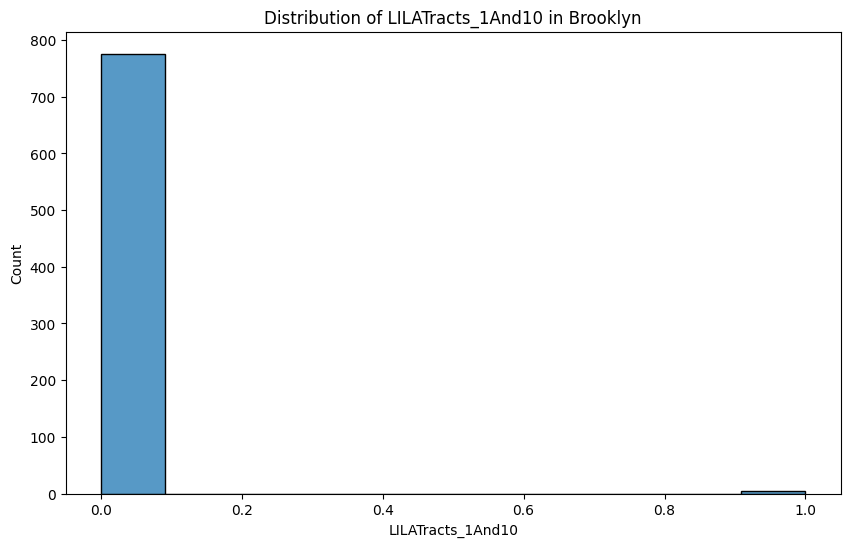

In [12]:
# Distribution of LILATracts_1And10 - Flag for low-income and low access when considering low accessibilty at 1 and 10 miles
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['LILATracts_1And10'])
plt.title('Distribution of LILATracts_1And10 in Brooklyn')
plt.show()

LILATracts_1And10 is a flag indicating whether a census tract is considered low-income and has low access to supermarkets within 1 and 10 miles. This metric helps identify areas that may face food accessibility issues, particularly those that are economically disadvantaged.

• High Count at 0-0.1: Most census tracts in Brooklyn do not meet the criteria for both low-income and low-access to supermarkets.

• Low Count at 0.9-1: A smaller number of census tracts are identified as low-income and low-access, indicating fewer areas with significant food access issues.

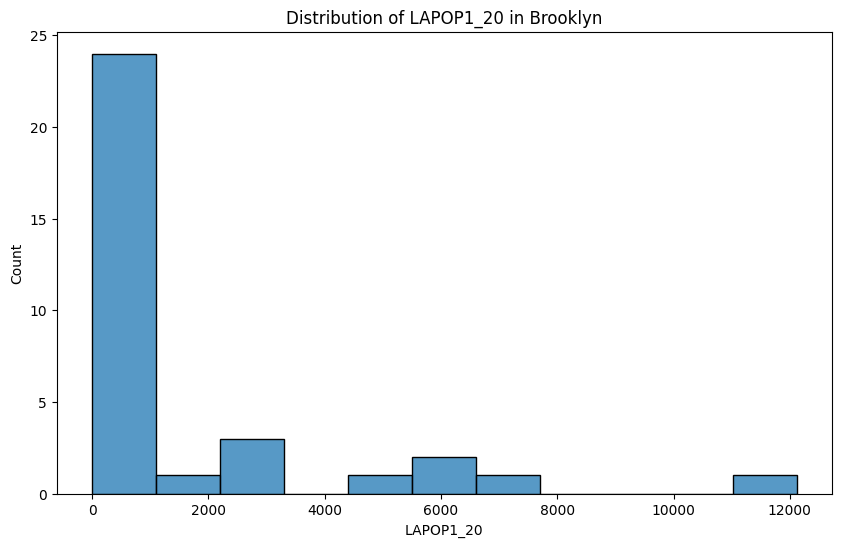

In [13]:
# Distribution of LAPOP1_20 - Population count beyond 1 mile for urban areas or 20 miles for rural areas from supermarket
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['LAPOP1_20'])
plt.title('Distribution of LAPOP1_20 in Brooklyn')
plt.show()

• 1-1000: This range has the highest count, indicating that most census tracts in Brooklyn have between 1 and 1000 people living beyond the specified distance from a supermarket.

• 1100-1200: This range has the lowest count, indicating that fewer tracts have between 1100 and 1200 people with limited access.

In [14]:
# # Select only numeric columns
# numeric_columns = df_brooklyn.select_dtypes(include=[float, int]).columns

# # Calculate the correlation matrix
# correlation_matrix = df_brooklyn[numeric_columns].corr()

# # Heatmap of the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for Brooklyn Data')
# plt.show()

In [15]:
# LowIncomeTracts	Low income tract	Flag for low income tract
# PovertyRate	Tract poverty rate	Share of the tract population living with income at or below the Federal poverty thresholds for family size


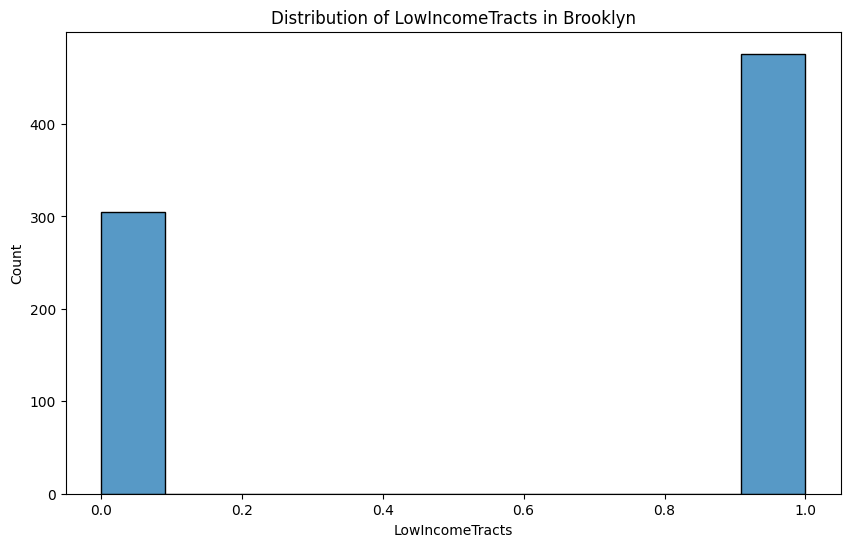

In [16]:
# Distribution of LowIncomeTracts
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['LowIncomeTracts'])
plt.title('Distribution of LowIncomeTracts in Brooklyn')
plt.show()

• 0-0.1 (Low Count = 300): This suggests that 300 tracts are not considered low-income.

• 0.9-1 (High Count = 500): This indicates that 500 tracts are classified as low-income, showing a significant proportion of the census tracts in Brooklyn face economic challenges.

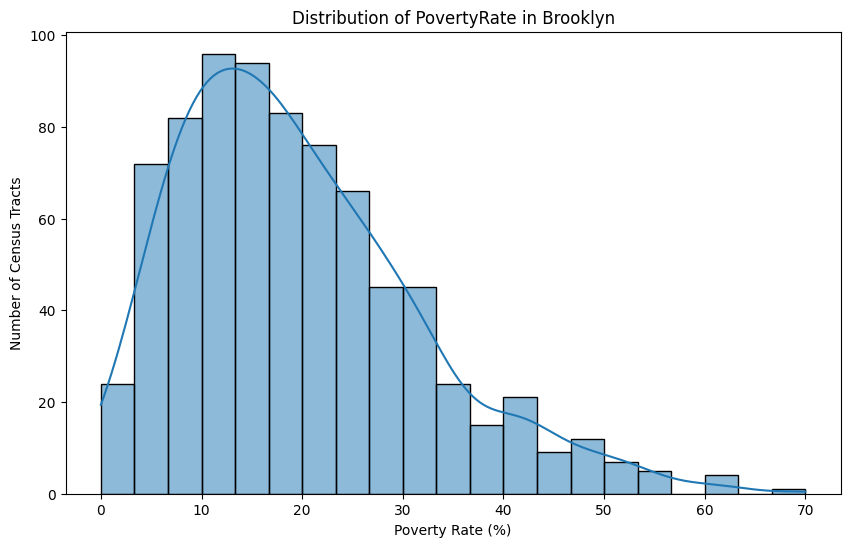

In [17]:
# Distribution of PovertyRate
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['PovertyRate'], kde=True)
plt.title('Distribution of PovertyRate in Brooklyn')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Number of Census Tracts')
plt.show()

The highest frequency range (10-18%) indicates the most common poverty rates. This range shows the highest frequency in the dataset, indicating that a significant portion of Brooklyn's population lives in tracts with moderate poverty levels. The frequency of tracts with poverty rates as high as 70% is very low, implying that extreme poverty is less common. 

A census tract is a low income area if it satisfies any of the following:

• The census tract’s poverty rate is 20% or greater

• The census tract’s median family income is less than or equal to 80% of the state-wide median family income

• The census tract is in a metropolitan area and has a median family income less than or equal to 80% of the metropolitan area’s median family income



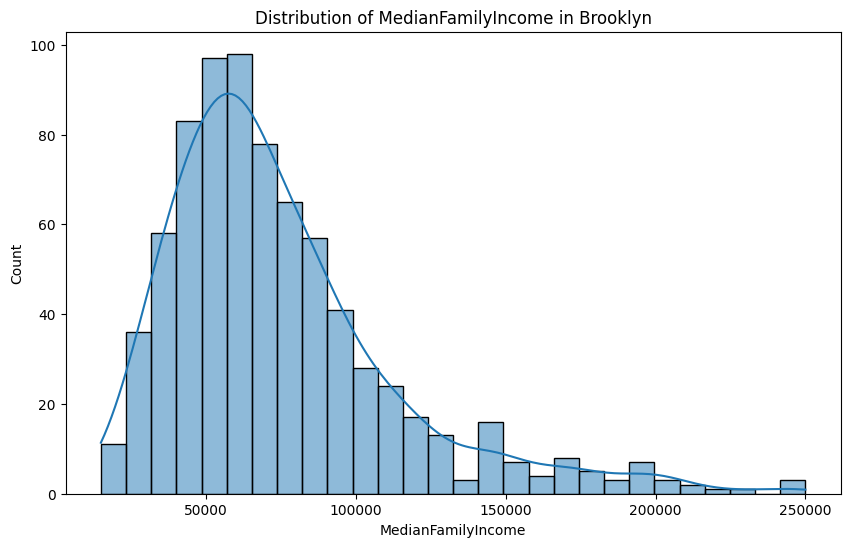

In [18]:
# Distribution of MedianFamilyIncome
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['MedianFamilyIncome'], kde=True)
plt.title('Distribution of MedianFamilyIncome in Brooklyn')
plt.show()

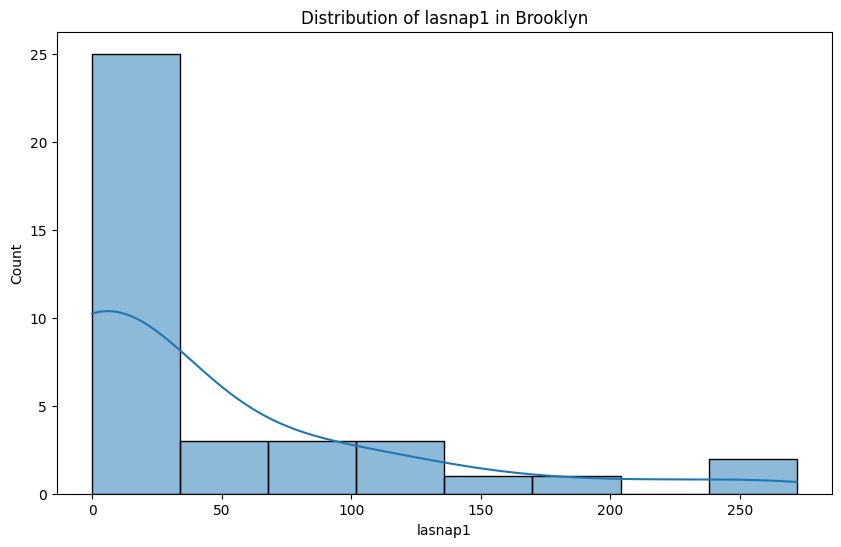

In [19]:
# Distribution of lasnap1 (Low access, housing units receiving SNAP benefits at 1 mile, number)
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['lasnap1'], kde=True)
plt.title('Distribution of lasnap1 in Brooklyn')
plt.show()

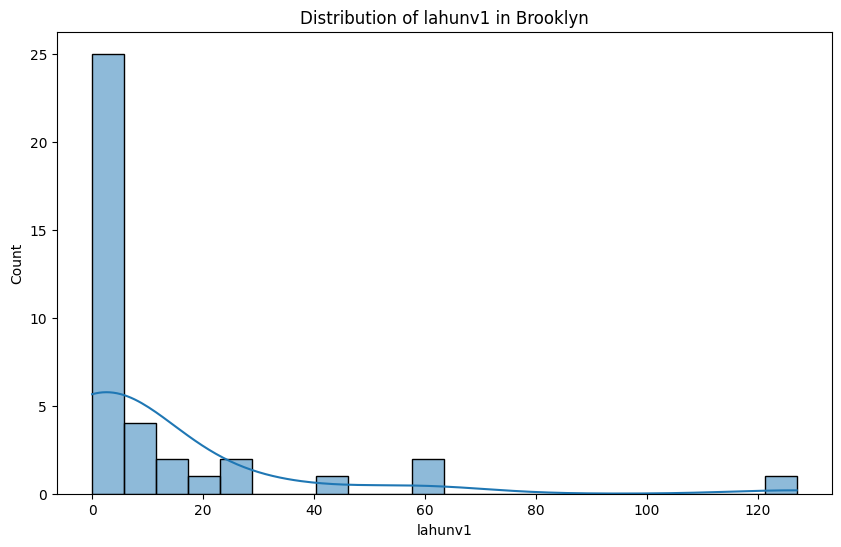

In [20]:
# Distribution of lahunv1 (Low access, housing units receiving SNAP benefits at 1 mile, number)
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['lahunv1'], kde=True)
plt.title('Distribution of lahunv1 in Brooklyn')
plt.show()

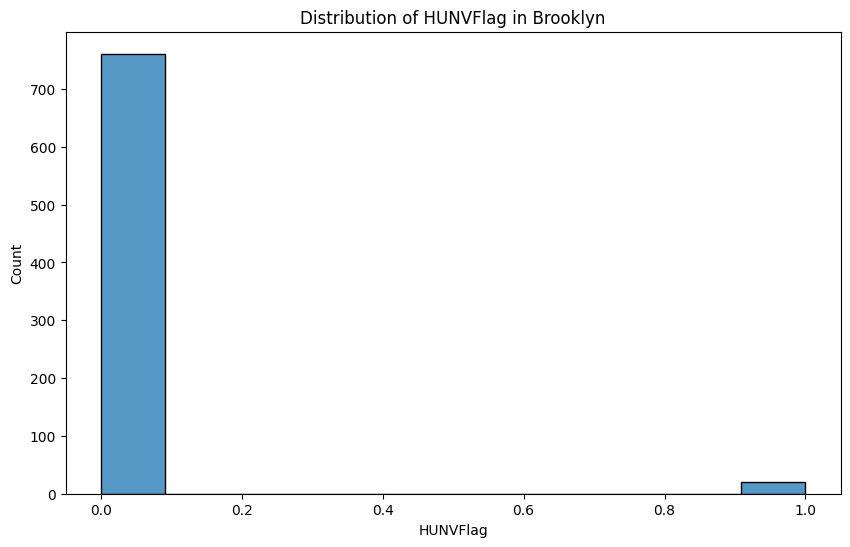

In [21]:


# Distribution of HUNVFlag - Vehicle access, tract with low vehicle access
plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['HUNVFlag'])
plt.title('Distribution of HUNVFlag in Brooklyn')
plt.show()

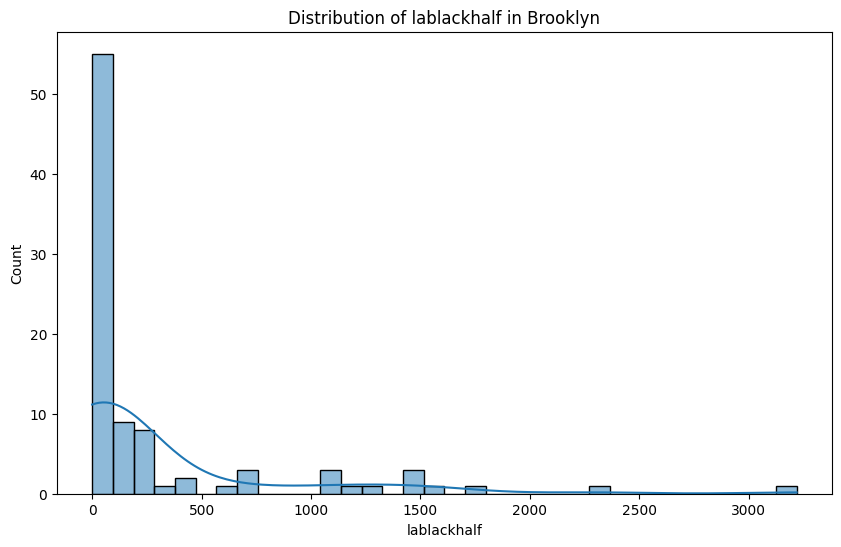

In [22]:
# lablackhalf - Black or African American population count beyond 1/2 mile from supermarket


plt.figure(figsize=(10, 6))
sns.histplot(df_brooklyn['lablackhalf'], kde=True)
plt.title('Distribution of lablackhalf in Brooklyn')
plt.show()


### K-means Clustering

In [23]:
# Selecting the relevant features
features = ['LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LILATracts_1And10', 'lasnap1']
df1 = df_brooklyn[features]

# Data Cleaning
mean_fill = df1.mean()
df1 = df1.fillna(mean_fill)

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

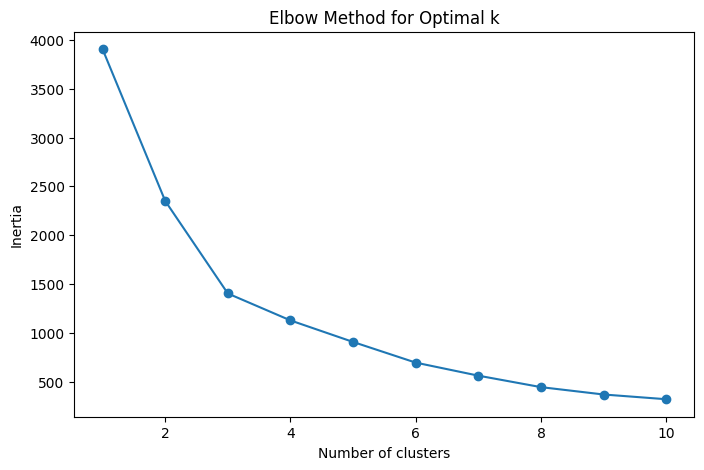

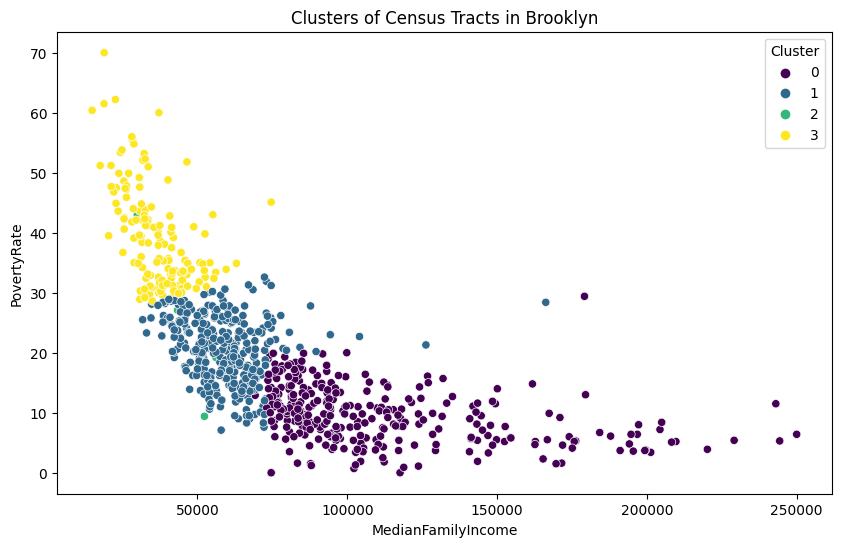

In [24]:

# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-means with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='MedianFamilyIncome', y='PovertyRate', hue='Cluster', palette='viridis')
plt.title('Clusters of Census Tracts in Brooklyn')
plt.show()

In [25]:
# Check the cluster centers
cluster_centers_km = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df1 = pd.DataFrame(cluster_centers_km, columns=features)
cluster_centers_df1['Cluster'] = range(1, 5)

# Reshape the DataFrame to one row
cluster_centers_reshaped = cluster_centers_df1.set_index('Cluster').T
print(cluster_centers_reshaped)


Cluster                        1             2         3             4
LowIncomeTracts     3.267974e-03  1.000000e+00      1.00  1.000000e+00
PovertyRate         9.476144e+00  2.045273e+01     25.74  3.936929e+01
MedianFamilyIncome  1.094768e+05  5.888583e+04  42851.00  3.651688e+04
LILATracts_1And10  -7.806256e-18 -7.806256e-18      1.00  3.469447e-18
lasnap1             4.195924e+01  4.392727e+01    134.00  4.248158e+01


Cluster 1: Represents areas with low poverty rates and high median family income, with minimal issues related to low-income tracts and vehicle access.

Cluster 2: Represents moderate-income areas with a significant proportion of low-income tracts and moderate poverty and vehicle access issues.

Cluster 3: Represents lower-income areas with high poverty rates, significant low-income and low-access tracts, and substantial vehicle access issues.

Cluster 4: Represents the most economically disadvantaged areas with the highest poverty rates and the lowest median family income, though vehicle access issues are moderate.


### Hierarchical Clustering

In [26]:
df2 = df_brooklyn[features]

In [27]:
df2.head(2)

,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LILATracts_1And10,lasnap1
4666,0,13.6,106563.0,0,107.0
4667,1,16.0,60789.0,0,113.0


In [28]:
# Data Cleaning

mean_fill = df2.mean()
df2 = df2.fillna(mean_fill)

# Standardization
scaler = StandardScaler()
scaled_features_df2 = scaler.fit_transform(df2)


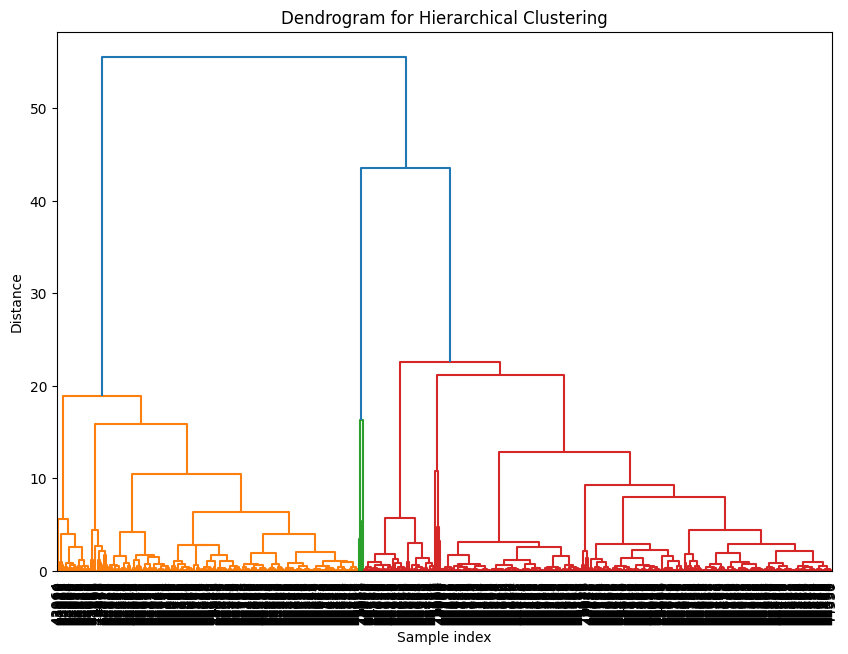

In [29]:
# Perform hierarchical clustering
hc = linkage(scaled_features_df2, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hc, labels=df2.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [37]:
# Determine the clusters (e.g., cut at a height to get 4 clusters)
clusters_hc = fcluster(hc, 4, criterion='maxclust')

# Add cluster labels to the DataFrame
df2['Cluster'] = clusters_hc

# Check the cluster centers
cluster_centers_hc = df2.groupby('Cluster').mean()
cluster_centers_df2 = pd.DataFrame(cluster_centers_hc, columns=features)
cluster_centers_df2['Cluster'] = range(1, 5)

# Reshape the DataFrame to one row
cluster_centers_reshaped_hc = cluster_centers_df2.set_index('Cluster').T
print(cluster_centers_reshaped_hc)

Cluster                         1         2             3             4
LowIncomeTracts          0.006579      1.00      1.000000      0.992500
PovertyRate              9.520066     25.74     45.884722     22.407500
MedianFamilyIncome  109794.923846  42851.00  31890.419520  55927.083527
LILATracts_1And10        0.000000      1.00      0.000000      0.000000
lasnap1                 41.121711    134.00     43.473684     44.129605


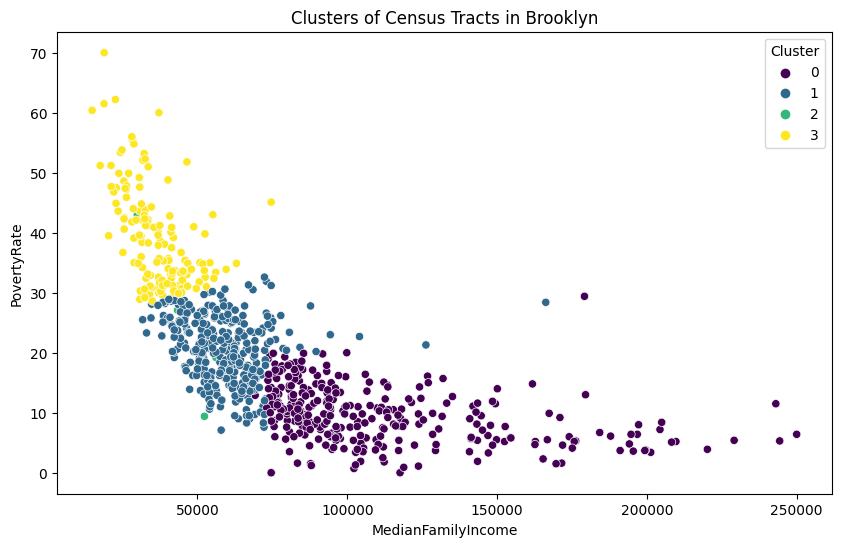

In [32]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='MedianFamilyIncome', y='PovertyRate', hue='Cluster', palette='viridis')
plt.title('Clusters of Census Tracts in Brooklyn')
plt.show()

### Gaussian Mixture Models (GMM)

In [33]:
df3 = df_brooklyn[features]

In [34]:
# Data Cleaning
mean_fill = df3.mean()
df3 = df3.fillna(mean_fill)

# Standardization
scaler = StandardScaler()
scaled_features_df3 = scaler.fit_transform(df3)

In [35]:
gmm = GaussianMixture(n_components=4)
gmm.fit(scaled_features_df3)

GaussianMixture(n_components=4)

Cluster                        1             2         3             4
LowIncomeTracts     1.000000e+00 -1.110223e-16      1.00  4.954980e-01
PovertyRate         2.615769e+01  9.393415e+00     25.74  1.365931e+01
MedianFamilyIncome  5.248966e+04  1.093768e+05  42851.00  7.492093e+04
LILATracts_1And10  -5.204170e-18 -4.336809e-18      1.00 -1.734723e-18
lasnap1             4.285661e+01  4.111352e+01    134.00  1.341158e+02


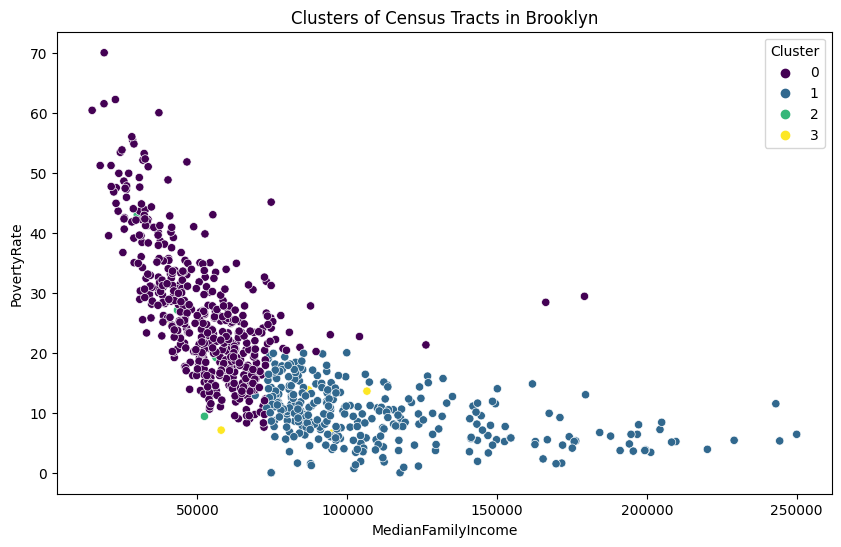

In [36]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
df3['Cluster'] = gmm.fit_predict(scaled_features_df3)

# Check the cluster centers
cluster_centers_gmm = scaler.inverse_transform(gmm.means_)
cluster_centers_df3 = pd.DataFrame(cluster_centers_gmm, columns=features)
cluster_centers_df3['Cluster'] = range(1, 5)
# print(cluster_centers_df)

# Reshape the DataFrame to one row
cluster_centers_reshaped = cluster_centers_df3.set_index('Cluster').T
print(cluster_centers_reshaped)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='MedianFamilyIncome', y='PovertyRate', hue='Cluster', palette='viridis')
plt.title('Clusters of Census Tracts in Brooklyn')
plt.show()